In [1]:
#in smallest form neuron acts as regressor 
#pseudo random number and generator --> normal distribution
#learnin rate--> read all the given diagrams and the content

In [2]:
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


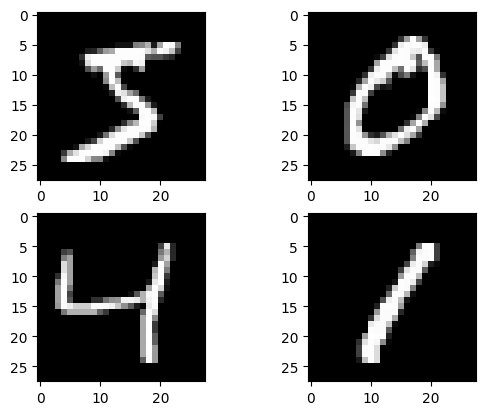

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [4]:
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [5]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [6]:
y_train.shape

(60000, 10)

In [9]:
# create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 592,074 (2.26 MB)

 Trainable params: 592,074 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from keras.utils import plot_model

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.8569 - loss: 0.4958 - val_accuracy: 0.9794 - val_loss: 0.0711
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.9768 - loss: 0.0777 - val_accuracy: 0.9804 - val_loss: 0.0565
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.9848 - loss: 0.0521 - val_accuracy: 0.9852 - val_loss: 0.0437
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.9873 - loss: 0.0408 - val_accuracy: 0.9860 - val_loss: 0.0418
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.9903 - loss: 0.0313 - val_accuracy: 0.9859 - val_loss: 0.0417
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.9911 - loss: 0.0284 - val_accuracy: 0.9885 - val_loss: 0.0326
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.9933 - loss: 0.0204 - val_accuracy: 0.9889 - val_loss: 0.0339
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.9942 - loss: 0.0179 - 

In [14]:
X_test[0:32].shape

(32, 28, 28, 1)

In [15]:
model.predict(X_test[0:32])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


array([[1.15140168e-10, 5.23052313e-09, 1.88336912e-07, 1.79845472e-06,
        3.29626604e-12, 3.69631770e-10, 1.67218333e-17, 9.99997735e-01,
        6.55797123e-08, 2.75399032e-07],
       [7.32306049e-10, 9.44544496e-08, 9.99999881e-01, 9.94228137e-12,
        5.07891709e-17, 1.82835626e-13, 3.81062737e-10, 1.51531999e-11,
        3.67862268e-10, 2.38957854e-14],
       [4.99494064e-08, 9.99996901e-01, 2.66518953e-07, 4.04465038e-11,
        6.58924023e-07, 7.83200562e-08, 7.83279717e-08, 1.66059965e-06,
        2.10247137e-07, 3.29342753e-09],
       [9.99952793e-01, 1.81341395e-08, 8.23664692e-08, 2.83913870e-09,
        1.31141209e-09, 1.35215918e-08, 4.68275248e-05, 6.07233801e-08,
        7.52737872e-09, 1.87862597e-07],
       [5.63844038e-09, 2.19077947e-08, 5.75065728e-09, 3.29909646e-08,
        9.99585807e-01, 2.09832560e-08, 1.69620922e-08, 4.04667531e-07,
        8.98765364e-08, 4.13650501e-04],
       [2.32640005e-08, 9.99996185e-01, 3.40567929e-08, 4.93519158e-12,
   

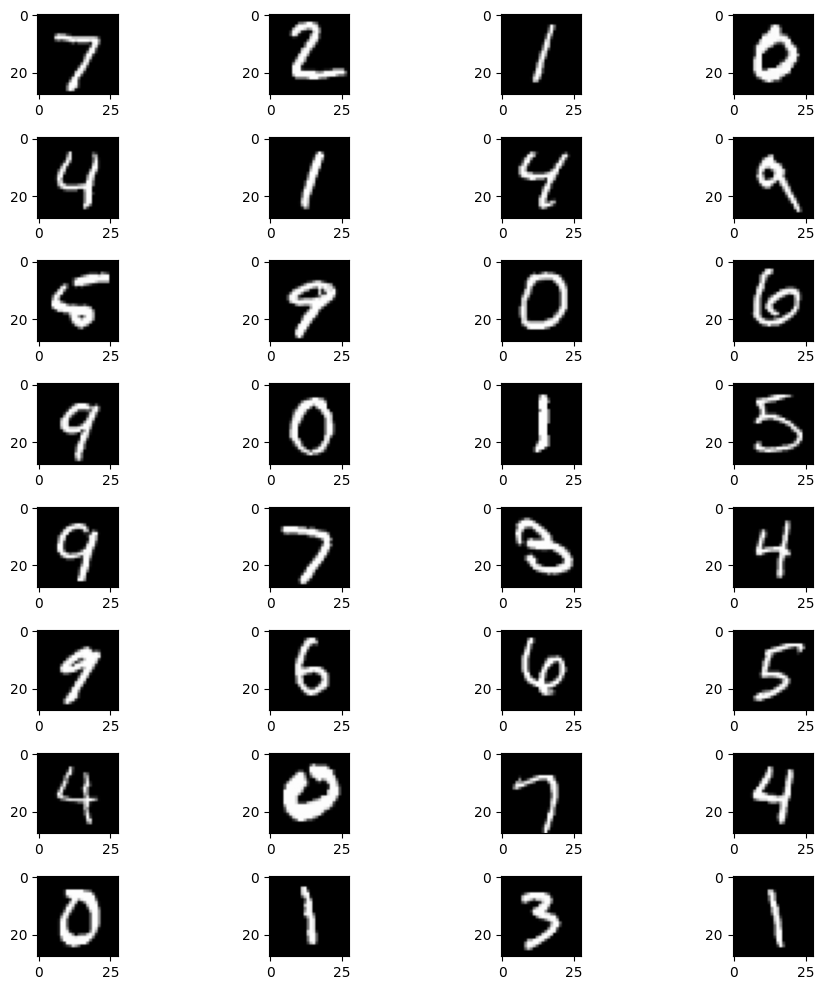

In [16]:
fig, axs = plt.subplots(ncols=4, nrows=8, figsize=(10,10))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(X_test[0:32][i], cmap=plt.get_cmap('gray'))
plt.tight_layout()
plt.show()